# 3.2.2 Distancia de Mahalanobis

**Distancia de Mahalanobis entre $\boldsymbol{y}$ y $\boldsymbol{\mu}$ con respecto a $\mathbf{\Sigma}^{-1}$:**
$$\Delta(\boldsymbol{y},\boldsymbol{\mu};\mathbf{\Sigma}^{-1})%
=\sqrt{(\boldsymbol{y}-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}(\boldsymbol{y}-\boldsymbol{\mu})}$$

**Gaussiana multivariada en términos de Mahalanobis (al cuadrado):**
$$p(\boldsymbol{y}\mid\boldsymbol{\mu},\mathbf{\Sigma})=%
\frac{1}{(2\pi)^{D/2}\lvert\mathbf{\Sigma}\rvert^{1/2}}%
\exp\left[-\frac{1}{2}\Delta^2(\boldsymbol{y},\boldsymbol{\mu};\mathbf{\Sigma}^{-1})\right]$$

**Mahalanobis como afinidad de la Euclídea (al origen):** $\quad\boldsymbol{x}=(r\cos\theta, r \sin\theta),\quad\mathbf{\Sigma}=\mathbf{W}\mathbf{W}^t,\quad\boldsymbol{y}=\mathbf{W}\boldsymbol{x}+\boldsymbol{\mu}$
$$\Delta^2(\boldsymbol{y},\boldsymbol{\mu};\mathbf{\Sigma}^{-1})%
=(\boldsymbol{y}-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}(\boldsymbol{y}-\boldsymbol{\mu})%
=(\mathbf{W}\boldsymbol{x})^t\mathbf{W}^{-t}{\mathbf{W}}^{-1}\mathbf{W}\boldsymbol{x}=\lVert\boldsymbol{x}\rVert_2^2$$



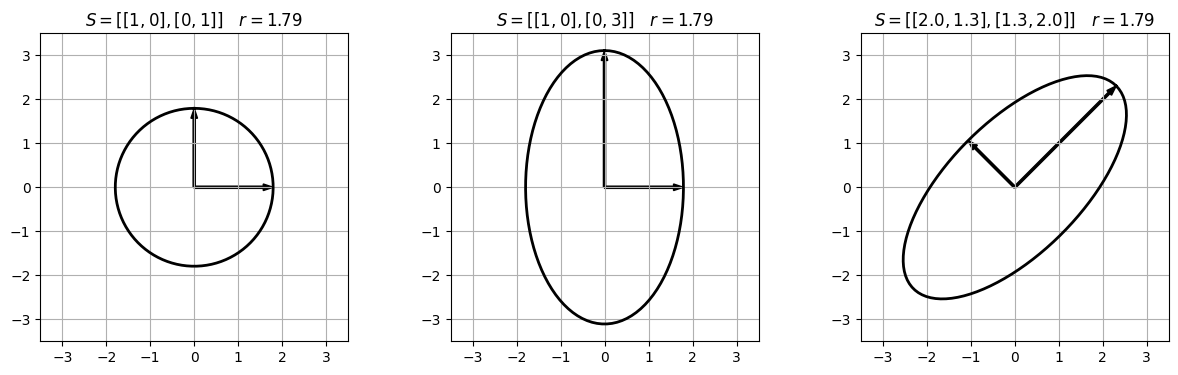

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import multivariate_normal
me, Se = [0, 0], [[1, 0], [0, 1]]; md, Sd = [0, 0], [[1, 0], [0, 3]]; mg, Sg = [0, 0], [[2., 1.3], [1.3, 2.]]
p = .8; r = np.sqrt(-2.0*np.log(1.0-p)); t = np.linspace(0, 2.0*np.pi, 100); 
C = np.array([np.cos(t), np.sin(t)]) * r; fig = plt.figure(figsize=(15, 4)); fig.tight_layout()
for i, (m, S) in enumerate(zip((me, md, mg), (Se, Sd, Sg)), start=1):
    ax = fig.add_subplot(1, 3, i, aspect='equal'); ax.set_xlim(-3.5, 3.5); ax.set_ylim(-3.5, 3.5); ax.grid()
    La, U = np.linalg.eigh(S); k = La.argsort()[::-1]; La = La[k]; U = U[:,k]; W = U @ np.diag(np.sqrt(La))
    Y = W @ C; ax.plot(*Y, lw=2, color='black'); ax.set_title(f'$S={S}\quad r={r:.2f}$')
    dx, dy = r * W @ np.array([1, 0]).T; ax.arrow(0, 0, dx, dy, width=.05, shape='full', length_includes_head=True, color='black')
    dx, dy = r * W @ np.array([0, 1]).T; ax.arrow(0, 0, dx, dy, width=.05, shape='full', length_includes_head=True, color='black')